In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import torch
import random
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
import EEGModels 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
warnings.filterwarnings('ignore')

2023-12-06 10:37:03.210575: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 10:37:03.210608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 10:37:03.211614: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 10:37:03.217746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 10:37:04.365354: W tensorflow/compiler/tf2

Num GPUs Available:  3


# Configurations

In [2]:
data_path = './dataset'
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)
cross = 20

cuda:1


# SVM

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.90094
Acc of test set: 0.89830
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91526
Acc of test set: 0.91458
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87261
Acc of test set: 0.87279
Begin to process person liangjie_20210424_2.
Acc of train set: 0.74210
Acc of test set: 0.74021
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75824
Acc of test set: 0.74418
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.82020
Acc of test set: 0.81406
Begin to process person tana_20210425_1.
Acc of train set: 0.92426
Acc of test set: 0.92736
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.77555
Acc of test set: 0.77014
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83927
Acc of test set: 0.83960
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.81229
Acc of test set: 0.80090
Begin to process person zhengwen

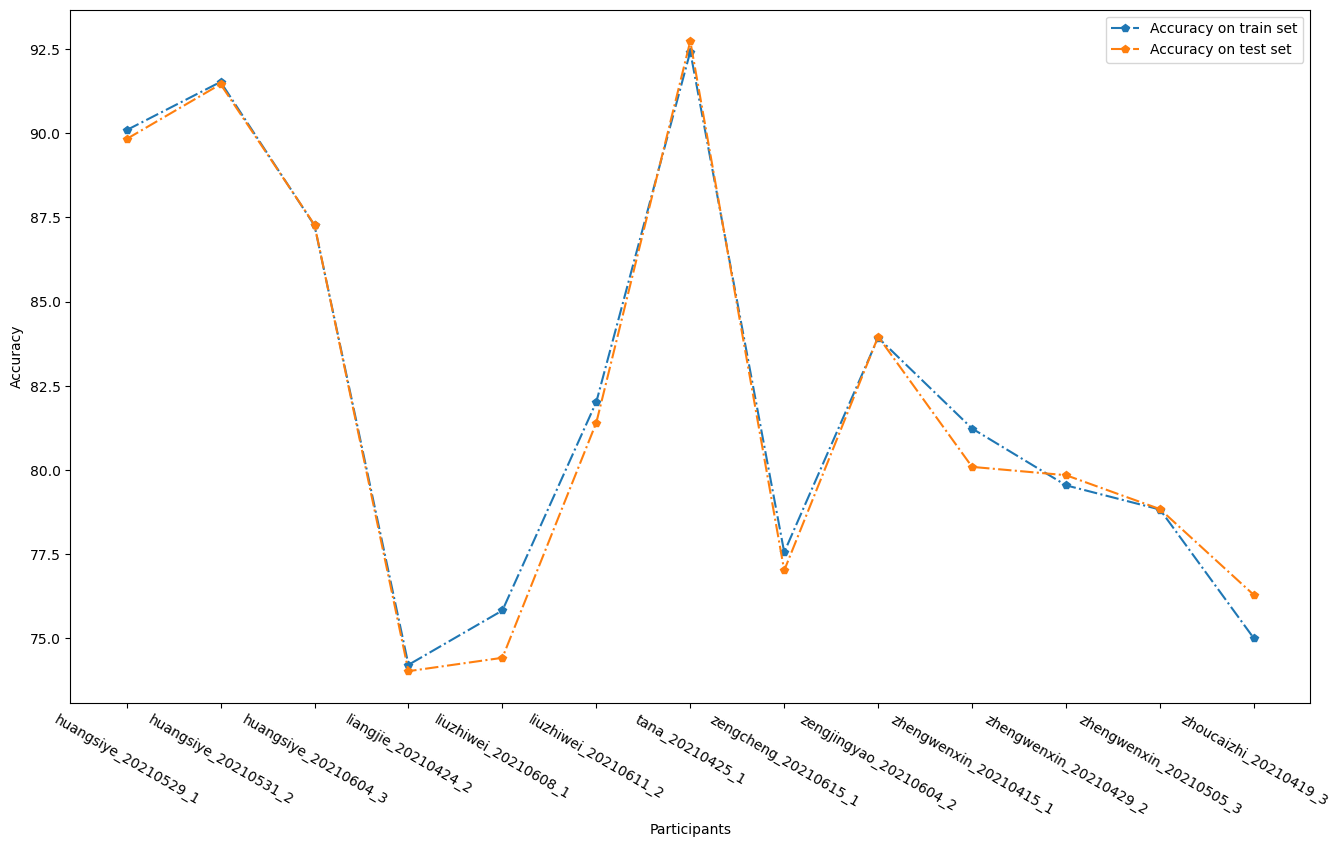

In [3]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_SVM = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = svm.SVC(C=1,kernel='rbf')
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_SVM.append(acc_test*100)
    acc_trains.append(acc_train*100)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_SVM, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

# Logistic Regression

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.89626
Acc of test set: 0.89506
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.91410
Acc of test set: 0.91661
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87211
Acc of test set: 0.87410
Begin to process person liangjie_20210424_2.
Acc of train set: 0.73863
Acc of test set: 0.72862
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.75313
Acc of test set: 0.75394
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.81784
Acc of test set: 0.81168
Begin to process person tana_20210425_1.
Acc of train set: 0.92506
Acc of test set: 0.92915
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.76675
Acc of test set: 0.77642
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.83322
Acc of test set: 0.84285
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.80795
Acc of test set: 0.80712
Begin to process person zhengwen

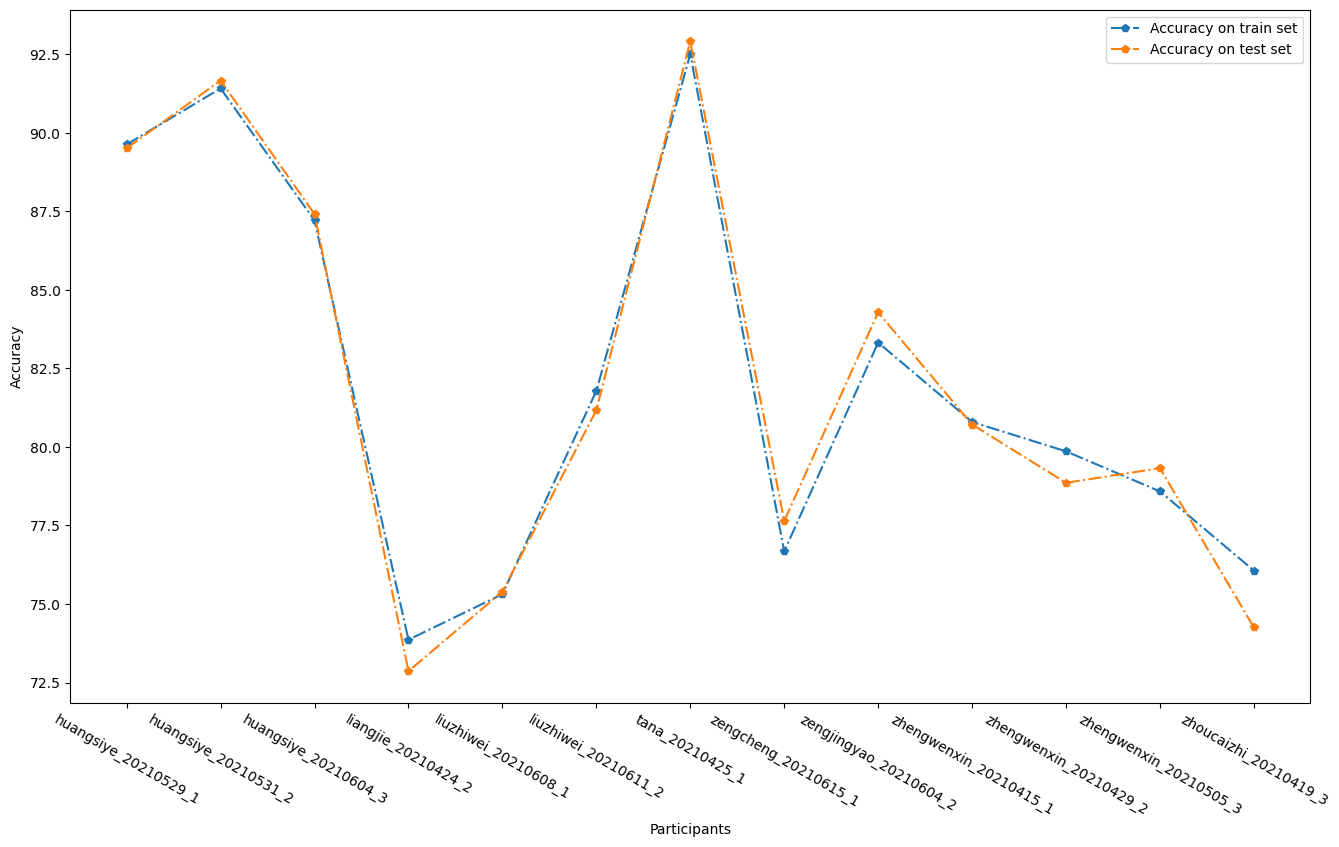

In [4]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_LR = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_LR.append(acc_test*100)
    acc_trains.append(acc_train*100)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_LR, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

# Decision Tree

Begin to process person huangsiye_20210529_1.
Acc of train set: 0.93016
Acc of test set: 0.88484
Begin to process person huangsiye_20210531_2.
Acc of train set: 0.95820
Acc of test set: 0.87514
Begin to process person huangsiye_20210604_3.
Acc of train set: 0.87960
Acc of test set: 0.86308
Begin to process person liangjie_20210424_2.
Acc of train set: 0.76490
Acc of test set: 0.72812
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 0.81398
Acc of test set: 0.71670
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 0.86840
Acc of test set: 0.78001
Begin to process person tana_20210425_1.
Acc of train set: 0.96819
Acc of test set: 0.89048
Begin to process person zengcheng_20210615_1.
Acc of train set: 0.80653
Acc of test set: 0.75566
Begin to process person zengjingyao_20210604_2.
Acc of train set: 0.84433
Acc of test set: 0.84060
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 0.83644
Acc of test set: 0.76844
Begin to process person zhengwen

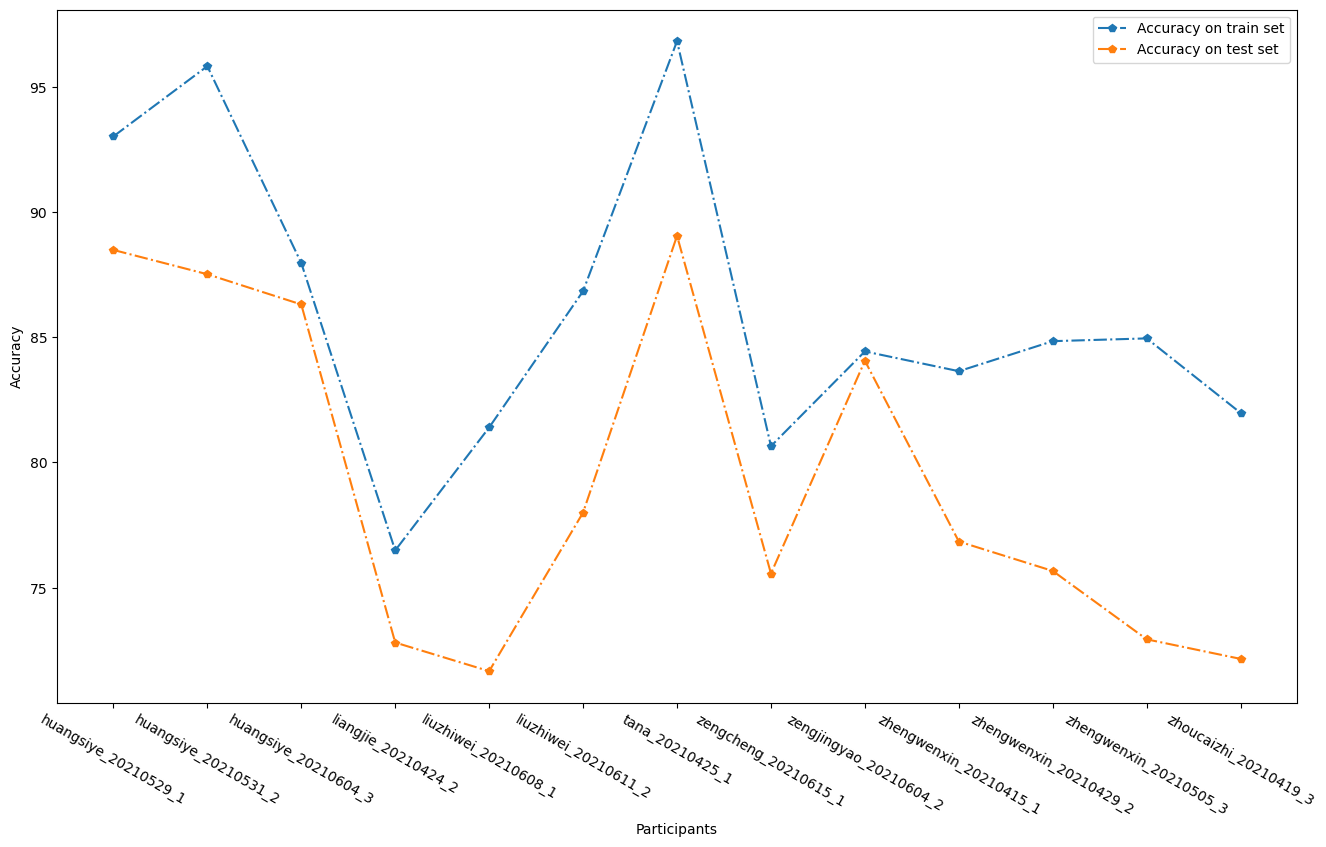

In [5]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_DTC = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label, test_data, test_label = traindata[:,:-1], traindata[:,-1], testdata[:,:-1], testdata[:,-1]
        classifier = DecisionTreeClassifier(criterion = 'entropy')
        classifier.fit(train_data, train_label)
        trains.append(classifier.score(train_data, train_label))
        tests.append(classifier.score(test_data, test_label))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_DTC.append(acc_test*100)
    acc_trains.append(acc_train*100)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_DTC, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

# Multi-layer Perceptron

In [6]:
class MLP(nn.Module):
    def __init__(self, num_classes=2):
        super(MLP, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(310, 2048),
            nn.ReLU(),
            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.Linear(2048, num_classes)
        )

    def forward(self, x):
        x = self.classifier(x)
        return x

In [7]:
def Validation(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total * 100

Begin to process person huangsiye_20210529_1.
Acc of train set: 89.24310
Acc of test set: 90.38782
Begin to process person huangsiye_20210531_2.
Acc of train set: 91.78324
Acc of test set: 91.15994
Begin to process person huangsiye_20210604_3.
Acc of train set: 87.19293
Acc of test set: 87.32515
Begin to process person liangjie_20210424_2.
Acc of train set: 73.45181
Acc of test set: 73.72304
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 75.59784
Acc of test set: 75.72597
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 81.75979
Acc of test set: 81.35912
Begin to process person tana_20210425_1.
Acc of train set: 92.73494
Acc of test set: 92.26532
Begin to process person zengcheng_20210615_1.
Acc of train set: 76.79319
Acc of test set: 77.41270
Begin to process person zengjingyao_20210604_2.
Acc of train set: 83.68982
Acc of test set: 82.81119
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 80.91011
Acc of test set: 80.62131
Begin to pro

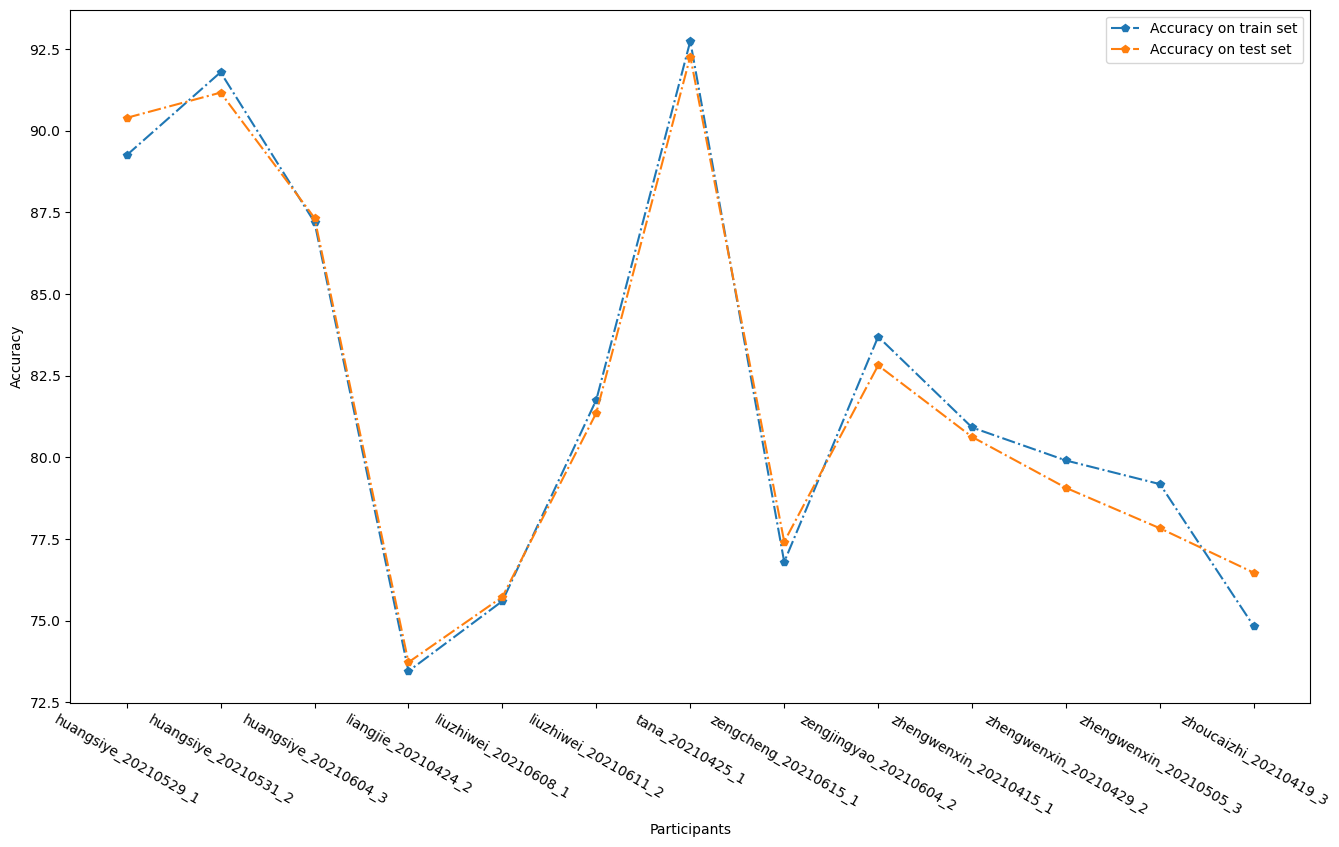

In [8]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_MLP = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = MLP().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_MLP.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_MLP, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

# Convolution Neural Network

In [9]:
class CNN(nn.Module):
    def __init__(self, num_classes = 2):
        super(CNN, self).__init__()
        # self.feature_extraction = nn.Sequential(
        #     nn.Conv1d(in_channels = 1, out_channels = 2, kernel_size = 16, padding = 1),
        #     nn.MaxPool1d(kernel_size = 8, stride = 1),
        #     nn.ReLU(),
        #     nn.Conv1d(in_channels = 2, out_channels = 2, kernel_size = 16),
        #     nn.Conv1d(in_channels = 2, out_channels = 4, kernel_size = 16, padding = 1),
        #     nn.ReLU()
        # )  
        # self.classifier = nn.Sequential(
        #     nn.Linear(1048, 2048),
        #     nn.ReLU(),
        #     nn.Dropout(),
        #     nn.Linear(2048, num_classes)
        # )
        self.feature_extraction = nn.Sequential(
            nn.Conv1d(in_channels = 5, out_channels = 8, kernel_size = 4, padding = 1),
            nn.MaxPool1d(kernel_size = 4, stride = 1),
            nn.ReLU(),
            nn.Conv1d(in_channels = 8, out_channels = 16, kernel_size = 4),
            nn.Conv1d(in_channels = 16, out_channels = 32, kernel_size = 4, padding = 1),
            nn.ReLU()
        )  
        self.classifier = nn.Sequential(
            nn.Linear(1728, 2048),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(2048, num_classes)
        )
    
    def forward(self, x):
        x = self.feature_extraction(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Begin to process person huangsiye_20210529_1.
Acc of train set: 89.69695
Acc of test set: 89.17175
Begin to process person huangsiye_20210531_2.
Acc of train set: 91.45951
Acc of test set: 91.47531
Begin to process person huangsiye_20210604_3.
Acc of train set: 87.32455
Acc of test set: 87.52737
Begin to process person liangjie_20210424_2.
Acc of train set: 73.81096
Acc of test set: 73.72481
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 75.92601
Acc of test set: 74.34900
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 81.98676
Acc of test set: 80.50628
Begin to process person tana_20210425_1.
Acc of train set: 92.59900
Acc of test set: 92.73580
Begin to process person zengcheng_20210615_1.
Acc of train set: 76.95573
Acc of test set: 76.81101
Begin to process person zengjingyao_20210604_2.
Acc of train set: 83.70957
Acc of test set: 83.09343
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 80.56936
Acc of test set: 81.44172
Begin to pro

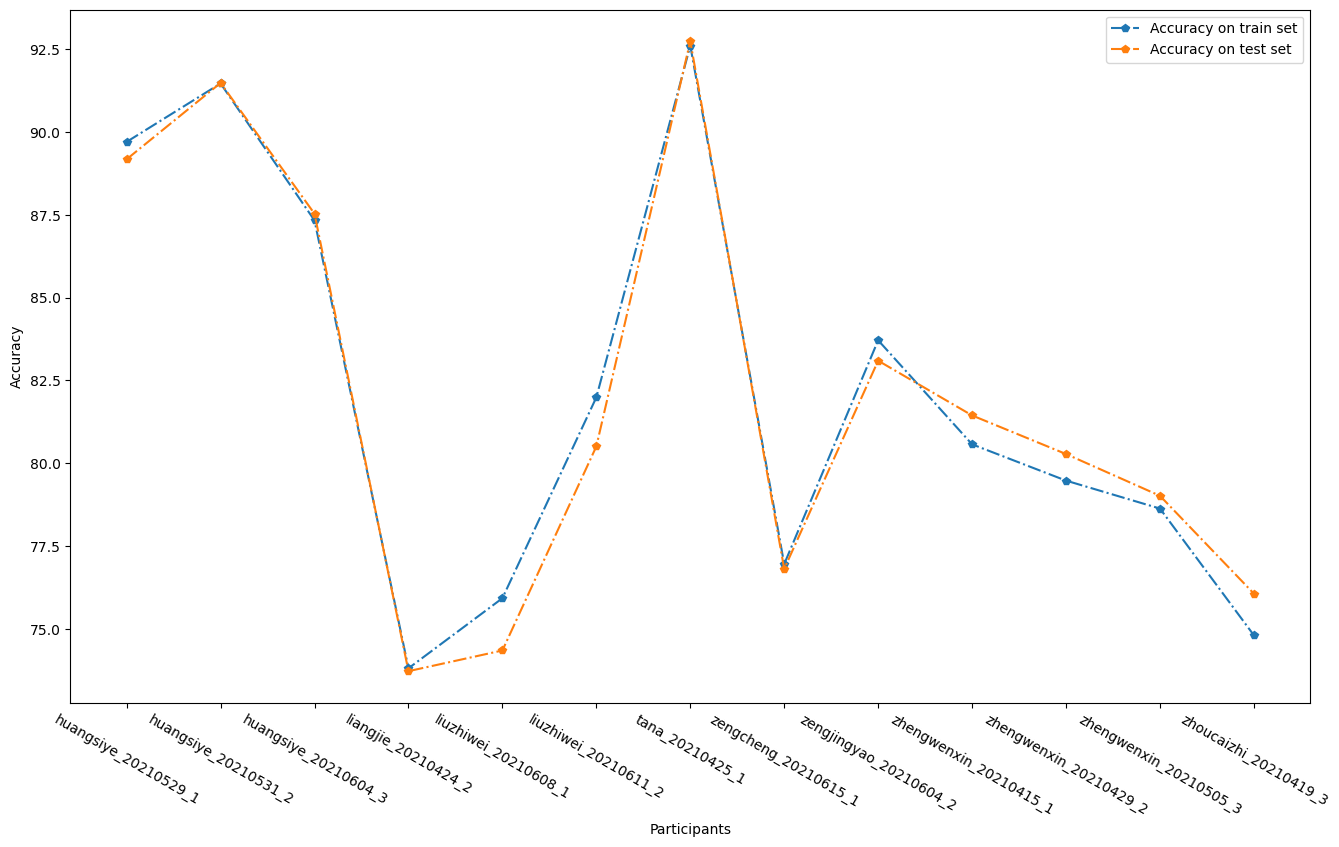

In [10]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_CNN = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_data = train_data.reshape(train_data.shape[0], 62, 5).permute(0, 2, 1)
        test_data = test_data.reshape(test_data.shape[0], 62, 5).permute(0, 2, 1)
        # train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1).permute(0, 2, 1)
        # test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], 1).permute(0, 2, 1)
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = CNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_CNN.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_CNN, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

# Recurrent Neural Network

In [11]:
class RNN(nn.Module):
    def __init__(self, hidden_size = 32, num_classes = 2):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size = 5, hidden_size = self.hidden_size, num_layers = 2, batch_first = True, bidirectional = True)
        self.classifier = nn.Sequential(
            nn.Linear(62 * self.hidden_size * 2, 2048),
            nn.ReLU(),
            nn.Linear(2048, num_classes)
        )
    
    def forward(self, x):
        x, _ = self.rnn(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Begin to process person huangsiye_20210529_1.
Acc of train set: 89.29201
Acc of test set: 90.16815
Begin to process person huangsiye_20210531_2.
Acc of train set: 91.63903
Acc of test set: 91.25418
Begin to process person huangsiye_20210604_3.
Acc of train set: 87.33652
Acc of test set: 87.23487
Begin to process person liangjie_20210424_2.
Acc of train set: 73.13665
Acc of test set: 74.86150
Begin to process person liuzhiwei_20210608_1.
Acc of train set: 75.55527
Acc of test set: 75.98299
Begin to process person liuzhiwei_20210611_2.
Acc of train set: 81.24654
Acc of test set: 82.64135
Begin to process person tana_20210425_1.
Acc of train set: 92.58787
Acc of test set: 92.79957
Begin to process person zengcheng_20210615_1.
Acc of train set: 77.64820
Acc of test set: 75.11144
Begin to process person zengjingyao_20210604_2.
Acc of train set: 82.70804
Acc of test set: 85.10418
Begin to process person zhengwenxin_20210415_1.
Acc of train set: 80.63109
Acc of test set: 80.95401
Begin to pro

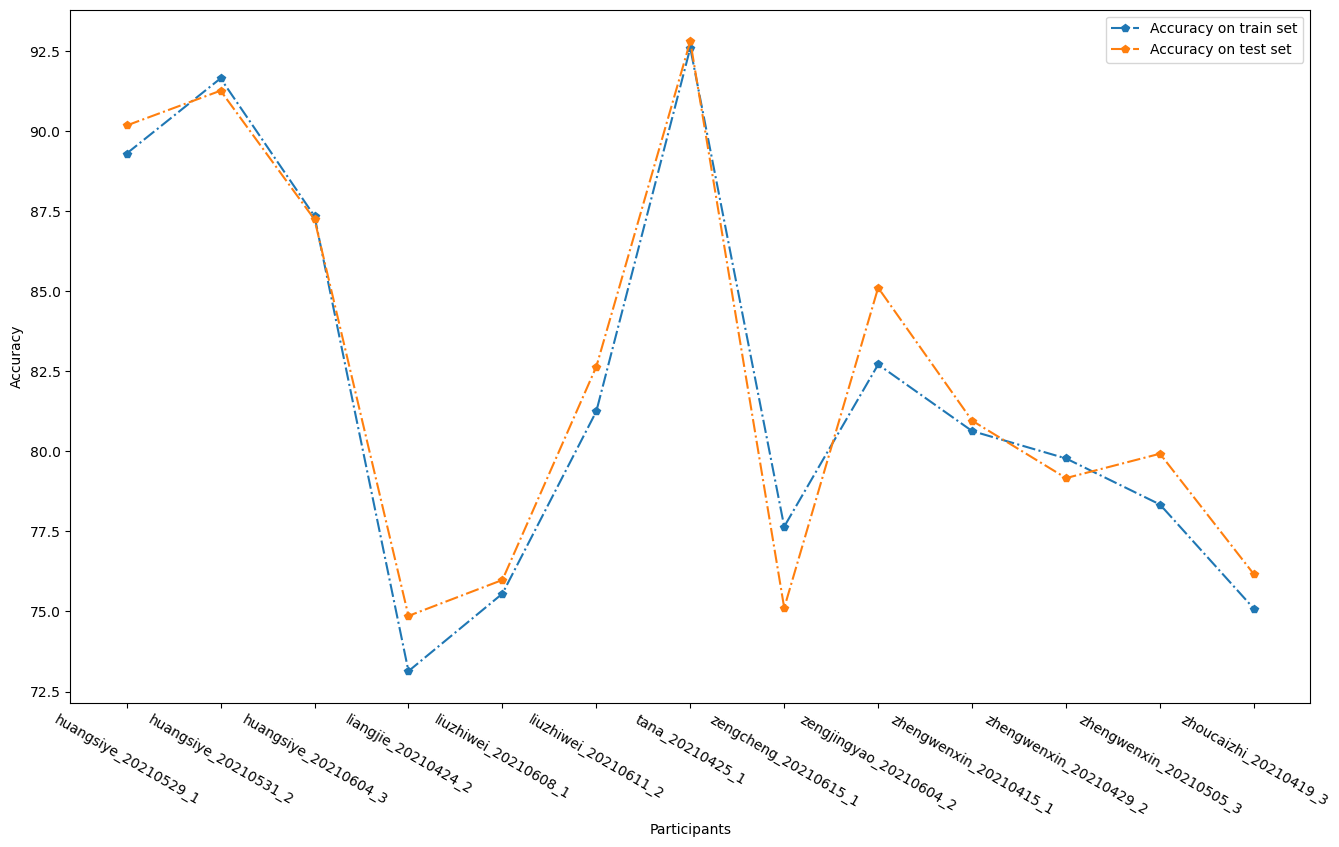

In [12]:
data_list = os.listdir(data_path)
acc_trains = []
acc_tests_RNN = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = torch.from_numpy(traindata[:,:-1]).float(), torch.from_numpy(traindata[:,-1])
        test_data, test_label = torch.from_numpy(testdata[:,:-1]).float(), torch.from_numpy(testdata[:,-1])
        train_data = train_data.reshape(train_data.shape[0], 62, 5)
        test_data = test_data.reshape(test_data.shape[0], 62, 5)
        train_set = torch.utils.data.TensorDataset(train_data, train_label)
        test_set = torch.utils.data.TensorDataset(test_data, test_label)
        train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=False, drop_last=False)
        test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=False, drop_last=False)
        net = RNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.8))
        epoches = 15
        for epoch in range(epoches): 
            if epoch > 10:
                optimizer = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.8))
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data[0].to(device), data[1].to(device)
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
                # print("Train Epoch: {} of {} [{} of {}] Loss: {:.5f}".format(epoch+1, epoches, i+1, len(train_loader), loss.item()))
        trains.append(Validation(net=net, testloader=train_loader))
        tests.append(Validation(net=net, testloader=test_loader))
    acc_train, acc_test = np.mean(trains), np.mean(tests)
    print("Acc of train set: {:.5f}".format(acc_train))
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_RNN.append(acc_test)
    acc_trains.append(acc_train)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_trains, '-.p')
plt.plot(x, acc_tests_RNN, '-.p')
plt.legend(['Accuracy on train set','Accuracy on test set'])
plt.show()

# EEGNet

12/12 [==============================] - 0s 21ms/step - loss: 0.5563
Epoch 11/15
12/12 [==============================] - 0s 22ms/step - loss: 0.5564
Epoch 12/15
12/12 [==============================] - 0s 22ms/step - loss: 0.5551
Epoch 13/15
12/12 [==============================] - 0s 20ms/step - loss: 0.5542
Epoch 14/15
12/12 [==============================] - 0s 21ms/step - loss: 0.5542
Epoch 15/15
12/12 [==============================] - 0s 22ms/step - loss: 0.5545
Acc of test set: 0.76683
Begin to process person liuzhiwei_20210611_2.
Epoch 1/15
9/9 [==============================] - 2s 21ms/step - loss: 0.6689
Epoch 2/15
9/9 [==============================] - 0s 20ms/step - loss: 0.6127
Epoch 3/15
9/9 [==============================] - 0s 20ms/step - loss: 0.5611
Epoch 4/15
9/9 [==============================] - 0s 18ms/step - loss: 0.5143
Epoch 5/15
9/9 [==============================] - 0s 21ms/step - loss: 0.4863
Epoch 6/15
9/9 [==============================] - 0s 21ms/step - 

2023-12-06 11:48:42.733656: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_633/dropout_1266/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - 2s 21ms/step - loss: 0.6746
Epoch 2/15
8/8 [==============================] - 0s 21ms/step - loss: 0.6305
Epoch 3/15
8/8 [==============================] - 0s 21ms/step - loss: 0.5900
Epoch 4/15
8/8 [==============================] - 0s 20ms/step - loss: 0.5526
Epoch 5/15
8/8 [==============================] - 0s 20ms/step - loss: 0.5244
Epoch 6/15
8/8 [==============================] - 0s 20ms/step - loss: 0.5061
Epoch 7/15
8/8 [==============================] - 0s 20ms/step - loss: 0.4969
Epoch 8/15
8/8 [==============================] - 0s 20ms/step - loss: 0.4909
Epoch 9/15
8/8 [==============================] - 0s 20ms/step - loss: 0.4880
Epoch 10/15
8/8 [==============================] - 0s 20ms/step - loss: 0.4946
Epoch 11/15
8/8 [==============================] - 0s 18ms/step - loss: 0.4927
Epoch 12/15
8/8 [==============================] - 0s 17ms/step - loss: 0.4895
Epoch 13/15
8/8 [==============================] - 0s 20ms/step - loss: 

2023-12-06 11:49:44.808984: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_649/dropout_1298/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


6/6 [==============================] - 2s 21ms/step - loss: 0.6767
Epoch 2/15
6/6 [==============================] - 0s 22ms/step - loss: 0.6326
Epoch 3/15
6/6 [==============================] - 0s 17ms/step - loss: 0.5877
Epoch 4/15
6/6 [==============================] - 0s 22ms/step - loss: 0.5395
Epoch 5/15
6/6 [==============================] - 0s 21ms/step - loss: 0.4929
Epoch 6/15
6/6 [==============================] - 0s 21ms/step - loss: 0.4523
Epoch 7/15
6/6 [==============================] - 0s 21ms/step - loss: 0.4065
Epoch 8/15
6/6 [==============================] - 0s 21ms/step - loss: 0.3687
Epoch 9/15
6/6 [==============================] - 0s 18ms/step - loss: 0.3415
Epoch 10/15
6/6 [==============================] - 0s 20ms/step - loss: 0.3126
Epoch 11/15
6/6 [==============================] - 0s 17ms/step - loss: 0.2982
Epoch 12/15
6/6 [==============================] - 0s 21ms/step - loss: 0.2862
Epoch 13/15
6/6 [==============================] - 0s 20ms/step - loss: 

2023-12-06 11:50:50.960655: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_664/dropout_1328/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


14/14 [==============================] - 2s 20ms/step - loss: 0.6634
Epoch 2/15
14/14 [==============================] - 0s 20ms/step - loss: 0.6035
Epoch 3/15
14/14 [==============================] - 0s 18ms/step - loss: 0.5528
Epoch 4/15
14/14 [==============================] - 0s 19ms/step - loss: 0.5307
Epoch 5/15
14/14 [==============================] - 0s 19ms/step - loss: 0.5236
Epoch 6/15
14/14 [==============================] - 0s 20ms/step - loss: 0.5221
Epoch 7/15
14/14 [==============================] - 0s 18ms/step - loss: 0.5246
Epoch 8/15
14/14 [==============================] - 0s 20ms/step - loss: 0.5210
Epoch 9/15
14/14 [==============================] - 0s 20ms/step - loss: 0.5248
Epoch 10/15
14/14 [==============================] - 0s 19ms/step - loss: 0.5235
Epoch 11/15
14/14 [==============================] - 0s 20ms/step - loss: 0.5183
Epoch 12/15
14/14 [==============================] - 0s 20ms/step - loss: 0.5289
Epoch 13/15
14/14 [=============================

2023-12-06 11:51:54.367074: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_675/dropout_1350/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 2s 21ms/step - loss: 0.6533
Epoch 2/15
16/16 [==============================] - 0s 19ms/step - loss: 0.5806
Epoch 3/15
16/16 [==============================] - 0s 19ms/step - loss: 0.5401
Epoch 4/15
16/16 [==============================] - 0s 18ms/step - loss: 0.5339
Epoch 5/15
16/16 [==============================] - 0s 19ms/step - loss: 0.5326
Epoch 6/15
16/16 [==============================] - 0s 19ms/step - loss: 0.5323
Epoch 7/15
16/16 [==============================] - 0s 18ms/step - loss: 0.5310
Epoch 8/15
16/16 [==============================] - 0s 21ms/step - loss: 0.5339
Epoch 9/15
16/16 [==============================] - 0s 20ms/step - loss: 0.5336
Epoch 10/15
16/16 [==============================] - 0s 19ms/step - loss: 0.5328
Epoch 11/15
16/16 [==============================] - 0s 20ms/step - loss: 0.5302
Epoch 12/15
16/16 [==============================] - 0s 21ms/step - loss: 0.5323
Epoch 13/15
16/16 [=============================

2023-12-06 11:52:55.754049: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_686/dropout_1372/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


12/12 [==============================] - 2s 21ms/step - loss: 0.6596
Epoch 2/15
12/12 [==============================] - 0s 20ms/step - loss: 0.5843
Epoch 3/15
12/12 [==============================] - 0s 18ms/step - loss: 0.5180
Epoch 4/15
12/12 [==============================] - 0s 20ms/step - loss: 0.4684
Epoch 5/15
12/12 [==============================] - 0s 19ms/step - loss: 0.4373
Epoch 6/15
12/12 [==============================] - 0s 20ms/step - loss: 0.4254
Epoch 7/15
12/12 [==============================] - 0s 19ms/step - loss: 0.4278
Epoch 8/15
12/12 [==============================] - 0s 20ms/step - loss: 0.4256
Epoch 9/15
12/12 [==============================] - 0s 19ms/step - loss: 0.4236
Epoch 10/15
12/12 [==============================] - 0s 21ms/step - loss: 0.4285
Epoch 11/15
12/12 [==============================] - 0s 20ms/step - loss: 0.4255
Epoch 12/15
12/12 [==============================] - 0s 19ms/step - loss: 0.4230
Epoch 13/15
12/12 [=============================

2023-12-06 11:53:58.520078: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_697/dropout_1394/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


11/11 [==============================] - 2s 19ms/step - loss: 0.6678
Epoch 2/15
11/11 [==============================] - 0s 16ms/step - loss: 0.6072
Epoch 3/15
11/11 [==============================] - 0s 19ms/step - loss: 0.5564
Epoch 4/15
11/11 [==============================] - 0s 19ms/step - loss: 0.5146
Epoch 5/15
11/11 [==============================] - 0s 19ms/step - loss: 0.4946
Epoch 6/15
11/11 [==============================] - 0s 19ms/step - loss: 0.4820
Epoch 7/15
11/11 [==============================] - 0s 19ms/step - loss: 0.4831
Epoch 8/15
11/11 [==============================] - 0s 21ms/step - loss: 0.4821
Epoch 9/15
11/11 [==============================] - 0s 20ms/step - loss: 0.4828
Epoch 10/15
11/11 [==============================] - 0s 19ms/step - loss: 0.4825
Epoch 11/15
11/11 [==============================] - 0s 20ms/step - loss: 0.4844
Epoch 12/15
11/11 [==============================] - 0s 17ms/step - loss: 0.4858
Epoch 13/15
11/11 [=============================

2023-12-06 11:54:59.947386: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_711/dropout_1422/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


6/6 [==============================] - 2s 21ms/step - loss: 0.6771
Epoch 2/15
6/6 [==============================] - 0s 22ms/step - loss: 0.6395
Epoch 3/15
6/6 [==============================] - 0s 19ms/step - loss: 0.6041
Epoch 4/15
6/6 [==============================] - 0s 21ms/step - loss: 0.5658
Epoch 5/15
6/6 [==============================] - 0s 19ms/step - loss: 0.5395
Epoch 6/15
6/6 [==============================] - 0s 18ms/step - loss: 0.5110
Epoch 7/15
6/6 [==============================] - 0s 18ms/step - loss: 0.4923
Epoch 8/15
6/6 [==============================] - 0s 20ms/step - loss: 0.4806
Epoch 9/15
6/6 [==============================] - 0s 20ms/step - loss: 0.4724
Epoch 10/15
6/6 [==============================] - 0s 21ms/step - loss: 0.4687
Epoch 11/15
6/6 [==============================] - 0s 21ms/step - loss: 0.4638
Epoch 12/15
6/6 [==============================] - 0s 20ms/step - loss: 0.4772
Epoch 13/15
6/6 [==============================] - 0s 20ms/step - loss: 

2023-12-06 11:56:00.868689: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_726/dropout_1452/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 [==============================] - 2s 18ms/step - loss: 0.6730
Epoch 2/15
9/9 [==============================] - 0s 20ms/step - loss: 0.6249
Epoch 3/15
9/9 [==============================] - 0s 20ms/step - loss: 0.5838
Epoch 4/15
9/9 [==============================] - 0s 19ms/step - loss: 0.5465
Epoch 5/15
9/9 [==============================] - 0s 19ms/step - loss: 0.5189
Epoch 6/15
9/9 [==============================] - 0s 19ms/step - loss: 0.5002
Epoch 7/15
9/9 [==============================] - 0s 18ms/step - loss: 0.4939
Epoch 8/15
9/9 [==============================] - 0s 19ms/step - loss: 0.4953
Epoch 9/15
9/9 [==============================] - 0s 17ms/step - loss: 0.4950
Epoch 10/15
9/9 [==============================] - 0s 21ms/step - loss: 0.4953
Epoch 11/15
9/9 [==============================] - 0s 20ms/step - loss: 0.4983
Epoch 12/15
9/9 [==============================] - 0s 20ms/step - loss: 0.4959
Epoch 13/15
9/9 [==============================] - 0s 20ms/step - loss: 

2023-12-06 11:57:00.920304: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_740/dropout_1480/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 [==============================] - 2s 19ms/step - loss: 0.6706
Epoch 2/15
9/9 [==============================] - 0s 21ms/step - loss: 0.6213
Epoch 3/15
9/9 [==============================] - 0s 22ms/step - loss: 0.5771
Epoch 4/15
9/9 [==============================] - 0s 21ms/step - loss: 0.5462
Epoch 5/15
9/9 [==============================] - 0s 20ms/step - loss: 0.5232
Epoch 6/15
9/9 [==============================] - 0s 19ms/step - loss: 0.5118
Epoch 7/15
9/9 [==============================] - 0s 16ms/step - loss: 0.5088
Epoch 8/15
9/9 [==============================] - 0s 19ms/step - loss: 0.5056
Epoch 9/15
9/9 [==============================] - 0s 21ms/step - loss: 0.5133
Epoch 10/15
9/9 [==============================] - 0s 19ms/step - loss: 0.5065
Epoch 11/15
9/9 [==============================] - 0s 21ms/step - loss: 0.5065
Epoch 12/15
9/9 [==============================] - 0s 20ms/step - loss: 0.5041
Epoch 13/15
9/9 [==============================] - 0s 18ms/step - loss: 

2023-12-06 11:58:04.315582: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_754/dropout_1508/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


11/11 [==============================] - 2s 21ms/step - loss: 0.6710
Epoch 2/15
11/11 [==============================] - 0s 19ms/step - loss: 0.6185
Epoch 3/15
11/11 [==============================] - 0s 19ms/step - loss: 0.5726
Epoch 4/15
11/11 [==============================] - 0s 21ms/step - loss: 0.5444
Epoch 5/15
11/11 [==============================] - 0s 21ms/step - loss: 0.5293
Epoch 6/15
11/11 [==============================] - 0s 20ms/step - loss: 0.5216
Epoch 7/15
11/11 [==============================] - 0s 20ms/step - loss: 0.5191
Epoch 8/15
11/11 [==============================] - 0s 21ms/step - loss: 0.5238
Epoch 9/15
11/11 [==============================] - 0s 21ms/step - loss: 0.5161
Epoch 10/15
11/11 [==============================] - 0s 19ms/step - loss: 0.5232
Epoch 11/15
11/11 [==============================] - 0s 20ms/step - loss: 0.5258
Epoch 12/15
11/11 [==============================] - 0s 18ms/step - loss: 0.5157
Epoch 13/15
11/11 [=============================

2023-12-06 11:59:06.375982: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_768/dropout_1536/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


7/7 [==============================] - 2s 20ms/step - loss: 0.6782
Epoch 2/15
7/7 [==============================] - 0s 20ms/step - loss: 0.6444
Epoch 3/15
7/7 [==============================] - 0s 19ms/step - loss: 0.6114
Epoch 4/15
7/7 [==============================] - 0s 21ms/step - loss: 0.5815
Epoch 5/15
7/7 [==============================] - 0s 20ms/step - loss: 0.5607
Epoch 6/15
7/7 [==============================] - 0s 21ms/step - loss: 0.5387
Epoch 7/15
7/7 [==============================] - 0s 21ms/step - loss: 0.5222
Epoch 8/15
7/7 [==============================] - 0s 20ms/step - loss: 0.5166
Epoch 9/15
7/7 [==============================] - 0s 19ms/step - loss: 0.5237
Epoch 10/15
7/7 [==============================] - 0s 21ms/step - loss: 0.5174
Epoch 11/15
7/7 [==============================] - 0s 19ms/step - loss: 0.5150
Epoch 12/15
7/7 [==============================] - 0s 21ms/step - loss: 0.5166
Epoch 13/15
7/7 [==============================] - 0s 20ms/step - loss: 

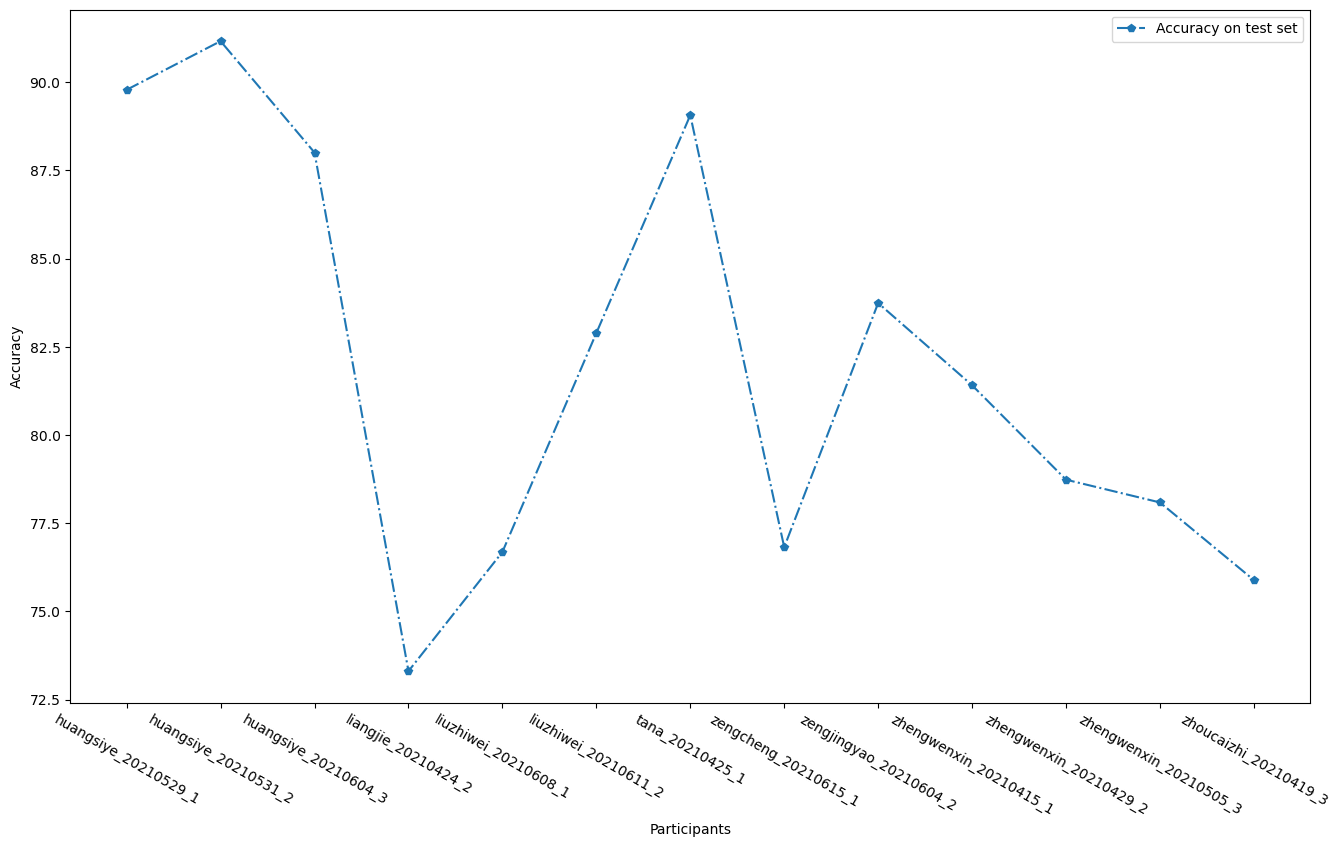

In [20]:
data_list = os.listdir(data_path)
acc_tests_EEGNet = []
for path in data_list:
    print("Begin to process person {}.".format(path.split('.')[0]))
    path = os.path.join(data_path, path)
    list_videos = os.listdir(path)
    trains, tests = [], []
    for i in range(cross):
        random.shuffle(list_videos)
        trainset, testset = list_videos[:7], list_videos[7:]
        traindata, testdata = np.load(os.path.join(path, trainset[0])), np.load(os.path.join(path, testset[0]))
        for j in range(1, len(trainset)):
            traindata = np.concatenate((traindata, np.load(os.path.join(path, trainset[j]))), axis=0)
        for j in range(1, len(testset)):
            testdata = np.concatenate((testdata, np.load(os.path.join(path, testset[j]))), axis=0)
        train_data, train_label = tf.convert_to_tensor(traindata[:,:-1]), tf.convert_to_tensor(traindata[:,-1])
        test_data, test_label = tf.convert_to_tensor(testdata[:,:-1]), tf.convert_to_tensor(testdata[:,-1])
        train_data = tf.reshape(train_data, [train_data.shape[0], 62, 5])
        test_data = tf.reshape(test_data, [test_data.shape[0], 62, 5])
        net = EEGModels.EEGNet_SSVEP(nb_classes=2, Chans=62, Samples=5)
        net.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam')
        net.fit(train_data,train_label,batch_size=64,epochs = 15)
        y = net(test_data).numpy()
        y = torch.Tensor(y)
        _, predicted = torch.max(y, 1)
        predicted = predicted.numpy()
        tests.append((predicted==test_label.numpy()).sum().item()/test_label.shape[0])
    acc_test = np.mean(tests)
    print("Acc of test set: {:.5f}".format(acc_test))
    acc_tests_EEGNet.append(acc_test*100)
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
x = os.listdir(data_path)
plt.plot(x, acc_tests_EEGNet, '-.p')
plt.legend(['Accuracy on test set'])
plt.show()

# Comparison of different models

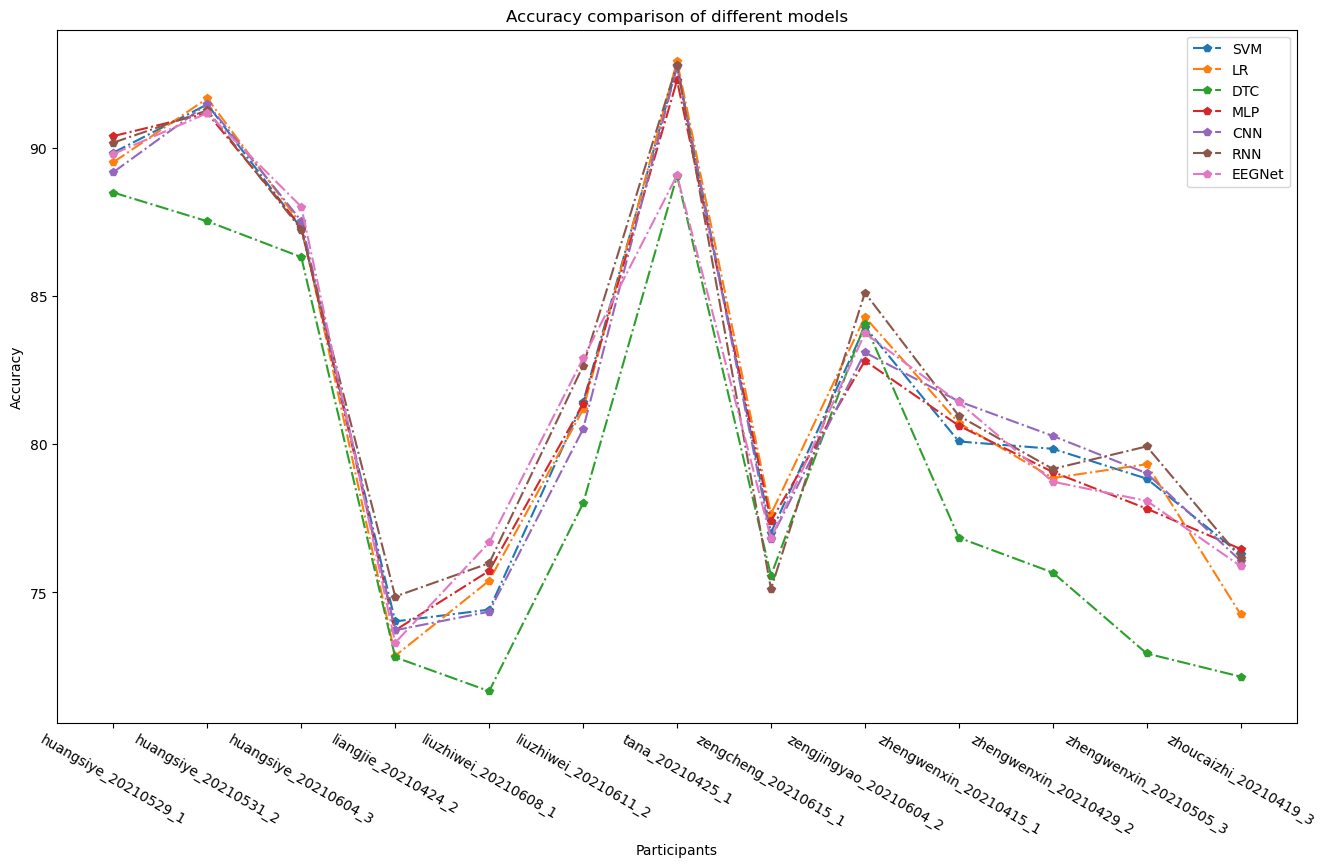

In [21]:
plt.figure(figsize = (16, 9))
plt.xlabel('Participants')
plt.xticks(rotation = -30)
plt.ylabel('Accuracy')
plt.title("Accuracy comparison of different models")
x = os.listdir(data_path)
plt.plot(x, acc_tests_SVM, '-.p')
plt.plot(x, acc_tests_LR, '-.p')
plt.plot(x, acc_tests_DTC, '-.p')
plt.plot(x, acc_tests_MLP, '-.p')
plt.plot(x, acc_tests_CNN, '-.p')
plt.plot(x, acc_tests_RNN, '-.p')
plt.plot(x, acc_tests_EEGNet, '-.p')
plt.legend(['SVM','LR','DTC','MLP','CNN','RNN','EEGNet'])
plt.show()

[82.09033036897797, 81.9993056276567, 79.31361740552028, 82.01087836778294, 82.01487314120594, 82.41225225499892, 81.96703314940676]
[6.170522683948628, 6.37773859626548, 6.475996588414361, 6.0548454307911035, 6.150761309880746, 6.116794214261873, 5.7437922691725385]


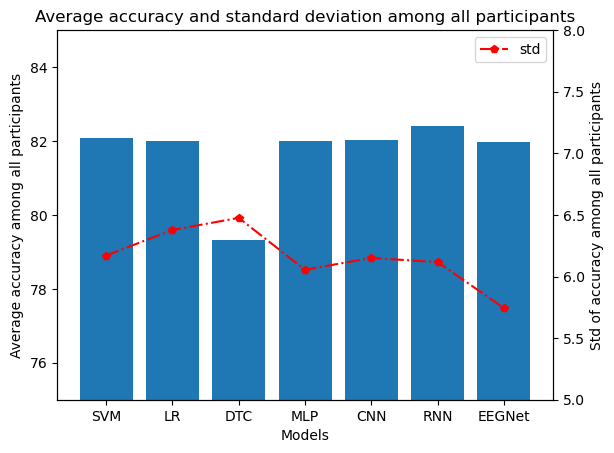

In [22]:
average = [np.mean(acc_tests_SVM), np.mean(acc_tests_LR), np.mean(acc_tests_DTC), 
           np.mean(acc_tests_MLP), np.mean(acc_tests_CNN), np.mean(acc_tests_RNN), np.mean(acc_tests_EEGNet)]
std = [np.std(acc_tests_SVM), np.std(acc_tests_LR), np.std(acc_tests_DTC), 
       np.std(acc_tests_MLP), np.std(acc_tests_CNN), np.std(acc_tests_RNN), np.std(acc_tests_EEGNet)]
models = ['SVM','LR','DTC','MLP','CNN','RNN','EEGNet']
print(average)
print(std)
fig, ax1 = plt.subplots()
ax1.bar(models, average)
ax1.set_xlabel('Models')
ax1.set_ylabel('Average accuracy among all participants')
ax1.set_ybound(75, 85)
ax2 = ax1.twinx()
ax2.plot(models, std, '-.p', color = 'red')
ax2.set_ylabel('Std of accuracy among all participants')
ax2.set_ybound(5.0, 8.0)
plt.title("Average accuracy and standard deviation among all participants")
plt.legend(['std'])
fig.show()